Please upload a DTMF tone (.wav file) for evaluation:


Saving dtmf_tone_hash.wav to dtmf_tone_hash.wav
Sample Rate: 8000 Hz


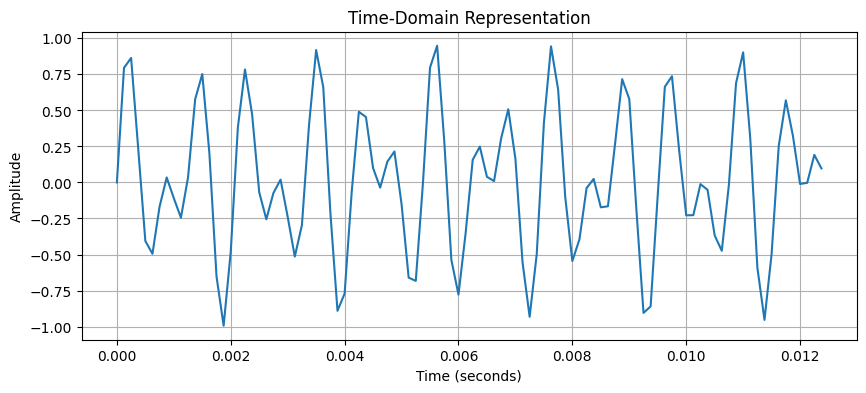

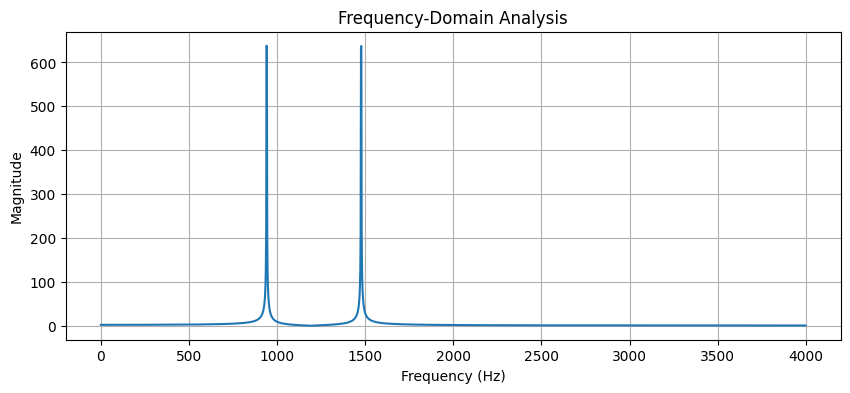

The detected DTMF key is: #


In [4]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from google.colab import files

# Dictionary holding the frequency pairs for DTMF keys
DTMF_TONES = {
    '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
    '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
    '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
    '0': (941, 1336), '*': (941, 1209), '#': (941, 1477)
}

# Function to upload a .wav file and extract the audio data
def load_audio():
    uploaded_file = files.upload()  # Initiates file upload
    for name in uploaded_file.keys():
        data, rate = sf.read(name)  # Read audio data and sampling rate
        return data, rate

# Visualize the first 100 samples in the time domain
def show_time_domain(data, rate):
    time_points = np.linspace(0, len(data) / rate, num=len(data))
    plt.figure(figsize=(10, 4))
    plt.plot(time_points[:100], data[:100])  # Display only the initial 100 samples
    plt.title("Time-Domain Representation")
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Visualize the audio signal in the frequency domain
def show_frequency_spectrum(data, rate):
    fft_values = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data), 1 / rate)
    magnitude = np.abs(fft_values[:len(fft_values) // 2])
    frequencies = frequencies[:len(frequencies) // 2]

    plt.figure(figsize=(10, 4))
    plt.plot(frequencies, magnitude)
    plt.title("Frequency-Domain Analysis")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Identify the DTMF key based on detected frequency peaks
def detect_dtmf_key(data, rate=8000, margin=20):
    fft_values = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(data), 1 / rate)
    magnitude = np.abs(fft_values[:len(fft_values) // 2])
    frequencies = frequencies[:len(frequencies) // 2]

    # Find the two most prominent frequencies
    top_indices = np.argsort(magnitude)[-2:]
    detected_frequencies = frequencies[top_indices]

    # Match detected frequencies with known DTMF tones
    for key, (low, high) in DTMF_TONES.items():
        if (np.isclose(detected_frequencies[0], low, atol=margin) and
            np.isclose(detected_frequencies[1], high, atol=margin)) or \
           (np.isclose(detected_frequencies[0], high, atol=margin) and
            np.isclose(detected_frequencies[1], low, atol=margin)):
            return key
    return None

# Main workflow
print("Please upload a DTMF tone (.wav file) for evaluation:")
audio, sample_rate = load_audio()

print(f"Sample Rate: {sample_rate} Hz")
show_time_domain(audio, sample_rate)
show_frequency_spectrum(audio, sample_rate)

key = detect_dtmf_key(audio, sample_rate)
if key:
    print(f"The detected DTMF key is: {key}")
else:
    print("Failed to recognize the DTMF key.")
